# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic
...,...,...,...,...,...,...
992,99114,18 to 21,18,Male,5298,Hispanic
995,99622,51+,86,Female,57055,White not Hispanic
996,99715,18 to 21,20,Male,7494,Hispanic
998,99791,6 to 12,10,Male,3638,Hispanic


Ethnicity
Hispanic              11065.569149
White not Hispanic    24697.548628
Name: Expenditures, dtype: float64

<AxesSubplot:ylabel='Expenditures'>

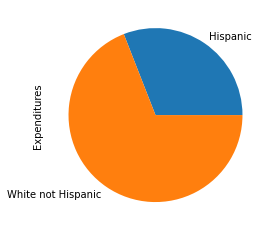

In [2]:
# YOUR CODE HERE
df = pd.read_csv("ca_dds_expenditures.csv")
sub_df = df[(df["Ethnicity"]=="White not Hispanic") | (df["Ethnicity"] == "Hispanic")]
sub_df
average = sub_df.groupby("Ethnicity").mean()["Expenditures"]
average 
average.plot.pie()

**YOUR EXPLANATION HERE**<br>
Here we see that expenditures on the White residents is much larger than the Hispanic residents. It is more than double for White expenditures.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

Expenditures                   
Ethnicity       Hispanic White not Hispanic
Age Cohort                                 
0 to 5       1393.204545        1366.900000
13 to 17     3955.281553        3904.358209
18 to 21     9959.846154       10133.057971
22 to 50    40924.116279       40187.624060
51+         55585.000000       52670.424242
6 to 12      2312.186813        2052.260870

<AxesSubplot:xlabel='Age Cohort'>

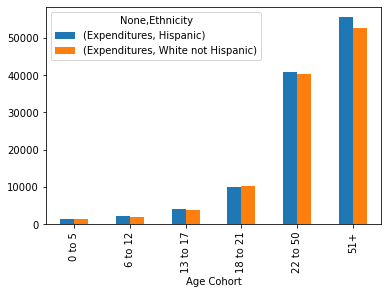

In [3]:
# YOUR CODE HERE
sub_df = df[(df["Ethnicity"]=="White not Hispanic") | (df["Ethnicity"] == "Hispanic")]
df_temp =sub_df.pivot_table(values=["Expenditures"], index=["Age Cohort"], columns = ["Ethnicity"], aggfunc=np.mean)
df_temp
df_temp.loc[["0 to 5","6 to 12","13 to 17","18 to 21","22 to 50","51+"]].fillna(1).plot.bar()

**YOUR EXPLANATION HERE**<br>
In this question we actually see that the average expenditures of Hispanic residents is higher than the average Expenditures of White residents within their respective age cohorts. By looking at these results it seems to contradict the data that was given in question 1 because it seems like in almost every age cohort Hispanic residents get the higher average of the expenditure.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

In [4]:
# YOUR CODE HERE (although you may want to add more code cells)
var_df = df[(df["Ethnicity"]=="White not Hispanic") | (df["Ethnicity"] == "Hispanic")]
count_temp =var_df.pivot_table(values=["Expenditures"], index=["Ethnicity"], columns = ["Age Cohort"], aggfunc=pd.Series.nunique)
count_temp
df_temp =var_df.pivot_table(values=["Expenditures"], index=["Ethnicity"], columns = ["Age Cohort"], aggfunc=np.var).fillna(0).round()
df_temp
print(df[(df["Ethnicity"]=="Hispanic")].var()['Expenditures'])
print(df[(df["Ethnicity"]=="White not Hispanic")].var()['Expenditures'])

Expenditures                                       
Age Cohort               0 to 5 13 to 17 18 to 21 22 to 50 51+ 6 to 12
Ethnicity                                                             
Hispanic                     44       99       78       43  17      90
White not Hispanic           20       67       69      132  66      46

Expenditures                                     \
Age Cohort               0 to 5   13 to 17    18 to 21    22 to 50   
Ethnicity                                                            
Hispanic               284517.0   881381.0  10438820.0  41823312.0   
White not Hispanic     513005.0  1147087.0   7320875.0  36982597.0   

                                          
Age Cohort                 51+   6 to 12  
Ethnicity                                 
Hispanic            29051737.0  677945.0  
White not Hispanic  41276367.0  710251.0

244292118.800539
424540323.66825426


/var/folders/_2/wd1wq27s6k71gfy42s_1y5880000gn/T/ipykernel_30881/2464058564.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[(df["Ethnicity"]=="Hispanic")].var()['Expenditures'])
/var/folders/_2/wd1wq27s6k71gfy42s_1y5880000gn/T/ipykernel_30881/2464058564.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[(df["Ethnicity"]=="White not Hispanic")].var()['Expenditures'])


**YOUR EXPLANATION HERE (although you may want to add more markdown cells)**<br>
For ages 0-5, 6-12, 13-17, and 18-21 there are more Hispanic residents therefore there is less expenditure per person in those age groups for Hispanics and more expenditure per person for Whites. But for ages 22-50 and 51+ there is more Whites than Hispanic, therefore more expenditure per person for Hispanics and less for Whites. The older ages are the reason the mean of the expeditures between Hispanic and White residents can look more biased towards the White residents.
The disadvantage of a mean is its outlier value. By looking at the count/amount of Hispanic and White not Hispanic resdients, we notice that the difference is less than or equal to 25. So now we would filter/group these counts through age groups/ranges. Hispanic residents only accounted for 60 of the residents whose age was 22 and older while White not Hispanic residents accounted for 199, which the difference greater than 3 times. Next, we analyzed which group, in terms of expenditures, created the majority of this older and larger generation. By looking at our table, we see that the majority of the top 50 people in this age group are White not Hispanic. By computing the variance by age and ethnicity, we analyze that there is double the variance in White not Hispanic. This demonstrates that there are a lot of outliers further away from the mean. By simply looking at the table that is grouped by age cohorts, we cannot determine nor clearly see this and that is why there is such a huge difference. By looking at the table that is grouped by age cohorts, we can tell and see that it is true that, on average when they are 22 and older, White not Hispanic and Hispanic groups spend almost the same expenditures. But from this table we do not see that White not Hispanic residents make a large percentage of the older crowd since the mean does not show us this. By creating the tables in this part, we can clearly see that  White not Hispanic residents actually make up 50% of the entire resident population. This means that only 16% of Hispanic residents make that average large expenditure while half of the population (White not Hispanic) is making large expenditures.